## 标注转mask

In [62]:
from pycocotools import mask as maskUtils
import numpy as np
# 标注的方框列表
seg=[[0.0,245.33,20.15,239.41,11.85,212.15,96.0,206.22,88.89,296.3,104.3,321.19,133.93,323.56,109.04,368.59,5.93,388.74],[356.74,427.85,341.33,369.78,327.11,336.59,323.56,316.44,368.59,306.96,365.04,424.3]]

compactedRLE = maskUtils.frPyObjects(seg, 500, 500)
compactedRLE

[{'size': [500, 500],
  'counts': b'e7<X?h0XOh0WOi0XOh0XOh0WO=DO1000O100RO`KhF`4X9dKcF\\4^9gK_FY4a9jK\\FV4d9mKXFT4h9PLTFP4l9SLQFl3P:WLmEi3S:l000O10O100000000O100000000O1000O1000O100000000O100000000O10O100000O100000000O1000000000O0100000000O100000000O100000O10O100000000O100000000[MkEJV:IYF5g9^OhF`0W9UOVGj0j8iNeGU1[8_NRH_1o7TN`Hj1g:N1O2N1N3N1O2N2N1N1000001O0O1N2N2N2N2O1N2N2N2N2O1N3M2N2N2O1N2N2N2N2O1N2N2N[lb5'},
 {'size': [500, 500],
  'counts': b'\\`n45_?6J6J4K4M2N2N3M2M3N3M2N2M4M2N2N3M2M5L4L3M4L4K5L3M4L4L4K5L3M4L4L4K100000O010O10000_O`0POQ1POP1oNZfo1'}]

RLE全称（run-length encoding），翻译为游程编码，又译行程长度编码，又称变动长度编码法（run coding），在控制论中对于二值图像而言是一种编码方法，对连续的黑、白像素数(游程)以不同的码字进行编码。游程编码是一种简单的非破坏性资料压缩法，其好处是加压缩和解压缩都非常快。其方法是计算连续出现的资料长度压缩之。

例子：ABBBBBBBBA - 1A8B1A

In [63]:
# 如果有多个区域需要merge
rle=maskUtils.merge(compactedRLE)
rle

{'size': [500, 500],
 'counts': b'e7<X?h0XOh0WOi0XOh0XOh0WO=DO1000O100RO`KhF`4X9dKcF\\4^9gK_FY4a9jK\\FV4d9mKXFT4h9PLTFP4l9SLQFl3P:WLmEi3S:l000O10O100000000O100000000O1000O1000O100000000O100000000O10O100000O100000000O1000000000O0100000000O100000000O100000O10O100000000O100000000[MkEJV:IYF5g9^OhF`0W9UOVGj0j8iNeGU1[8_NRH_1o7TN`Hj1g:N1O2N1N3N1O2N2N1N1000001O0O1N2N2N2N2O1N2N2N2N2O1N3M2N2N2O1N2N2N2N2O1N2N2NWXm22igRM6J6J4K4M2N2N3M2M3N3M2N2M4M2N2N3M2M5L4L3M4L4K5L3M4L4L4K5L3M4L4L4K100000O010O10000_O`0POQ1POP1oNZfo1'}

In [64]:
m=maskUtils.decode(rle)
m.shape

(500, 500)

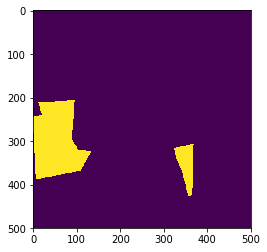

In [65]:
import matplotlib.pyplot as plt
plt.imshow(m)

In [66]:
np.unique(m[m!=0])

array([1], dtype=uint8)

## mask转标注

In [86]:
from skimage import measure,draw

def close_contour(contour):
    if not np.array_equal(contour[0], contour[-1]):
        contour = np.vstack((contour, contour[0]))
    return contour

def binary_mask_to_polygon(binary_mask, tolerance=0):
    """Converts a binary mask to COCO polygon representation
    Args:
    binary_mask: a 2D binary numpy array where '1's represent the object
    tolerance: Maximum distance from original points of polygon to approximated
    polygonal chain. If tolerance is 0, the original coordinate array is returned.
    """
    

    polygons = []
    # pad mask to close contours of shapes which start and end at an edge
    padded_binary_mask = np.pad(binary_mask, pad_width=1, mode='constant', constant_values=0)
    contours = measure.find_contours(padded_binary_mask, 0.5)
    contours = np.subtract(contours, 1)
    for contour in contours:
        contour = close_contour(contour)
        contour = measure.approximate_polygon(contour, tolerance)
        if len(contour) < 3:
            continue
        contour = np.flip(contour, axis=1)
        segmentation = contour.ravel().tolist()
        # after padding and subtracting 1 we may get -0.5 points in our segmentation
        segmentation = [0 if i < 0 else i for i in segmentation]
        polygons.append(segmentation)

    return polygons

In [83]:
# 找到所有轮廓
from skimage import measure
contours=measure.find_contours(m,0)
len(contours)

2

In [ ]:
# 转为多边形

In [89]:
a=binary_mask_to_polygon(m)

In [91]:
len(a)

2

In [93]:
a[0]

[6.0,
 388.5,
 5.5,
 388.0,
 5.5,
 387.0,
 5.5,
 386.0,
 5.5,
 385.0,
 5.5,
 384.0,
 5.5,
 383.0,
 5.5,
 382.0,
 5.5,
 381.0,
 5.5,
 380.0,
 5.5,
 379.0,
 5.5,
 378.0,
 5.5,
 377.0,
 5.0,
 376.5,
 4.5,
 376.0,
 4.5,
 375.0,
 4.5,
 374.0,
 4.5,
 373.0,
 4.5,
 372.0,
 4.5,
 371.0,
 4.5,
 370.0,
 4.5,
 369.0,
 4.5,
 368.0,
 4.5,
 367.0,
 4.5,
 366.0,
 4.5,
 365.0,
 4.5,
 364.0,
 4.5,
 363.0,
 4.5,
 362.0,
 4.5,
 361.0,
 4.5,
 360.0,
 4.5,
 359.0,
 4.5,
 358.0,
 4.5,
 357.0,
 4.5,
 356.0,
 4.5,
 355.0,
 4.5,
 354.0,
 4.5,
 353.0,
 4.0,
 352.5,
 3.5,
 352.0,
 3.5,
 351.0,
 3.5,
 350.0,
 3.5,
 349.0,
 3.5,
 348.0,
 3.5,
 347.0,
 3.5,
 346.0,
 3.5,
 345.0,
 3.5,
 344.0,
 3.5,
 343.0,
 3.5,
 342.0,
 3.5,
 341.0,
 3.5,
 340.0,
 3.5,
 339.0,
 3.5,
 338.0,
 3.5,
 337.0,
 3.5,
 336.0,
 3.5,
 335.0,
 3.5,
 334.0,
 3.5,
 333.0,
 3.5,
 332.0,
 3.5,
 331.0,
 3.5,
 330.0,
 3.5,
 329.0,
 3.0,
 328.5,
 2.5,
 328.0,
 2.5,
 327.0,
 2.5,
 326.0,
 2.5,
 325.0,
 2.5,
 324.0,
 2.5,
 323.0,
 2.5,
 322.0,
 2.5,
